In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("data-1-Table 1.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,Female,26,1,30,1,< 1 Year,No,31136,152,186,0,NaN,NaN,
1,2,Male,48,1,3,0,1-2 Year,No,38233,124,246,0,NaN,NaN,NaN
2,3,Male,60,1,28,0,1-2 Year,Yes,66338,124,73,0,NaN,NaN,NaN
3,4,Male,59,1,23,0,1-2 Year,No,27865,124,39,0,NaN,NaN,NaN
4,5,Female,59,1,26,1,1-2 Year,No,35649,122,136,0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22762 non-null  int64  
 1   Gender                22762 non-null  object 
 2   Age                   22762 non-null  int64  
 3   Driving_License       22762 non-null  int64  
 4   Region_Code           22762 non-null  int64  
 5   Previously_Insured    22762 non-null  int64  
 6   Vehicle_Age           22762 non-null  object 
 7   Vehicle_Damage        22762 non-null  object 
 8   Annual_Premium        22762 non-null  int64  
 9   Policy_Sales_Channel  22762 non-null  int64  
 10  Vintage               22762 non-null  int64  
 11  Response              22762 non-null  int64  
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           1 non-null      object 
dtypes: float64(2), int6

In [5]:
df["Unnamed: 12"].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Unnamed: 12, dtype: float64

In [6]:
#since unnamed has majority of its values missing(close to 100) we will drop this dataset
df.isnull().sum()

id                          0
Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Response                    0
Unnamed: 12             22762
Unnamed: 13             22762
Unnamed: 14             22761
dtype: int64

In [7]:
df.dropna(axis = 1, thresh = 22000, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    22762 non-null  int64 
 1   Gender                22762 non-null  object
 2   Age                   22762 non-null  int64 
 3   Driving_License       22762 non-null  int64 
 4   Region_Code           22762 non-null  int64 
 5   Previously_Insured    22762 non-null  int64 
 6   Vehicle_Age           22762 non-null  object
 7   Vehicle_Damage        22762 non-null  object
 8   Annual_Premium        22762 non-null  int64 
 9   Policy_Sales_Channel  22762 non-null  int64 
 10  Vintage               22762 non-null  int64 
 11  Response              22762 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.1+ MB


In [9]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
#converting object data to numerical datatype
#1st we'll do Vehicle_Damage 
df["Vehicle_Damage"]

0         No
1         No
2        Yes
3         No
4         No
        ... 
22757    Yes
22758    Yes
22759     No
22760    Yes
22761     No
Name: Vehicle_Damage, Length: 22762, dtype: object

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
ordinal_encoder = OrdinalEncoder()

In [13]:
df["Vehicle_Damage"] = ordinal_encoder.fit_transform(df[["Vehicle_Damage"]])

In [14]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [15]:
#convert Vehicle_Age to numeric data type
df["Vehicle_Age"] = ordinal_encoder.fit_transform(df[["Vehicle_Age"]])

In [16]:
ordinal_encoder.categories_

[array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)]

In [17]:
df["Gender"] = ordinal_encoder.fit_transform(df[["Gender"]])

##EXPLORATORY DATA ANALYSIS

In [18]:
##TARGET VARIABLE = RESPONSE VARIABLE 

In [19]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.0,26,1,30,1,1.0,0.0,31136,152,186,0
1,2,1.0,48,1,3,0,0.0,0.0,38233,124,246,0
2,3,1.0,60,1,28,0,0.0,1.0,66338,124,73,0
3,4,1.0,59,1,23,0,0.0,0.0,27865,124,39,0
4,5,0.0,59,1,26,1,0.0,0.0,35649,122,136,0


In [20]:
df.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.006330,-0.005019,0.002736,0.006283,0.014393,0.002426,-0.006569,0.004476,0.003961,0.014867,-0.007575
Gender,0.006330,1.000000,0.148330,-0.024792,0.006031,-0.085564,-0.115590,0.095983,0.002259,-0.119139,-0.015021,0.041462
Age,-0.005019,0.148330,1.000000,-0.077177,0.045044,-0.263077,-0.523161,0.261192,0.059555,-0.576533,-0.001189,0.105917
Driving_License,0.002736,-0.024792,-0.077177,1.000000,0.001616,0.017428,0.039689,-0.024534,-0.020360,0.045944,-0.004399,0.008058
Region_Code,0.006283,0.006031,0.045044,0.001616,1.000000,-0.016520,-0.032569,0.020037,-0.012095,-0.042666,-0.001614,0.007137
Previously_Insured,0.014393,-0.085564,-0.263077,0.017428,-0.016520,1.000000,0.177217,-0.825254,0.005702,0.224512,0.002178,-0.335676
Vehicle_Age,0.002426,-0.115590,-0.523161,0.039689,-0.032569,0.177217,1.000000,-0.164823,0.032399,0.389027,0.016918,-0.100417
Vehicle_Damage,-0.006569,0.095983,0.261192,-0.024534,0.020037,-0.825254,-0.164823,1.000000,0.007062,-0.217216,-0.004224,0.348514
Annual_Premium,0.004476,0.002259,0.059555,-0.020360,-0.012095,0.005702,0.032399,0.007062,1.000000,-0.119257,-0.003876,0.021119
Policy_Sales_Channel,0.003961,-0.119139,-0.576533,0.045944,-0.042666,0.224512,0.389027,-0.217216,-0.119257,1.000000,0.011207,-0.139984


<AxesSubplot:>

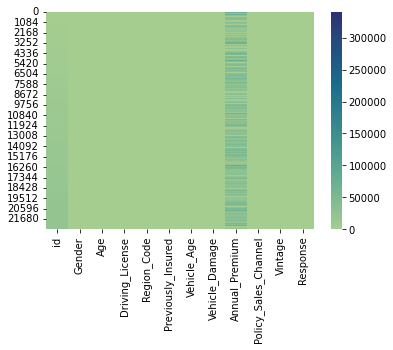

In [21]:
sns.heatmap(df, cmap = "crest")

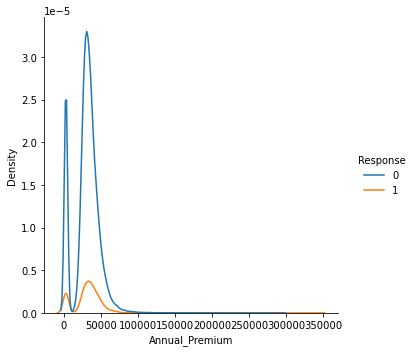

In [22]:
#we can see that annual premium has some corealation so we will plo the graph out 
sns.displot(data=df, x="Annual_Premium", hue="Response", kind="kde")

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

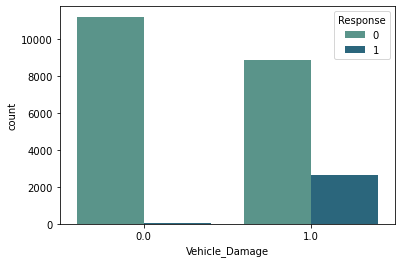

In [23]:
sns.countplot(data = df, x = "Vehicle_Damage", hue = "Response", palette = "crest" )

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [27]:
X = df[['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']]
y = df['Response']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42) 
for X_train, X_test in split.split(df, df["Vehicle_Damage"]):
        strat_train_set_X = df.loc[X_train]
        strat_test_set_X = df.loc[X_test]
     

In [94]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42) 
for y_train, y_test in split.split(df, df["Response"]):
        strat_train_set_y = df.loc[y_train]
        strat_test_set_y = df.loc[y_test]
     

In [95]:
strat_train_set_y["Response"].value_counts() /len(strat_train_set_y)

0    0.881049
1    0.118951
Name: Response, dtype: float64

In [121]:
Y_train = strat_train_set_y["Response"]

In [122]:
Y_test = strat_test_set_y["Response"]

In [123]:
strat_train_set_X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
15903,15904,1.0,28,1,28,0,1.0,1.0,2630,152,50,0
2715,2716,1.0,72,1,28,0,0.0,1.0,48842,26,164,0
14448,14449,1.0,76,1,43,1,0.0,0.0,29775,124,28,0
6893,6894,1.0,25,1,29,1,1.0,0.0,21586,152,265,0
14692,14693,1.0,40,1,29,0,0.0,1.0,28202,124,225,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19702,19703,1.0,62,1,8,1,0.0,0.0,23962,7,208,0
17459,17460,0.0,23,1,43,0,1.0,1.0,34172,152,290,0
5579,5580,1.0,52,1,3,0,0.0,1.0,2630,26,223,0
21676,21677,1.0,77,1,28,1,0.0,0.0,45789,147,170,0


In [124]:
strat_test_set["Vehicle_Damage"].value_counts() / len(strat_test_set)

1.0    0.505192
0.0    0.494808
Name: Vehicle_Damage, dtype: float64

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
logmodel = LogisticRegression()

In [127]:
logmodel.fit(strat_train_set_X,Y_train)

LogisticRegression()

In [128]:
from sklearn.metrics import classification_report

In [129]:
predictions = logmodel.predict(strat_test_set_X)

In [136]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6618
           1       0.00      0.00      0.00       894

    accuracy                           0.88      7512
   macro avg       0.44      0.50      0.47      7512
weighted avg       0.78      0.88      0.83      7512



/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasleengill/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
acc = logmodel.score(strat_test_set_X,Y_test)*100

In [158]:
acc

88.09904153354633

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier(n_neighbors=2)

In [144]:
knn.fit(strat_train_set_X,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [145]:
pred = knn.predict(strat_test_set_X)

In [146]:
acc2 = knn.score(strat_test_set_X,Y_test)*100

In [151]:
round(acc2, 2)

86.89

In [148]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6618
           1       0.12      0.02      0.03       894

    accuracy                           0.87      7512
   macro avg       0.50      0.50      0.48      7512
weighted avg       0.79      0.87      0.82      7512



In [149]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(strat_train_set_X,Y_train)

SVC()

In [150]:
acc3 = svm.score(strat_test_set_X,Y_test)*100

In [157]:
acc3

88.09904153354633

In [153]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(strat_train_set_X,Y_train)

DecisionTreeClassifier()

In [154]:
acc4 = dtc.score(strat_test_set_X,Y_test)*100

In [156]:
round(acc4, 2)

78.3